<a href="https://colab.research.google.com/github/OJB-Quantum/Ideas-for-DUV-LASER-Diode-Litho/blob/main/Patterning_Nodes_vs_Critical_Dimensions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Authored by Onri Jay Benally (2025)

Open Access (CC-BY-4.0)

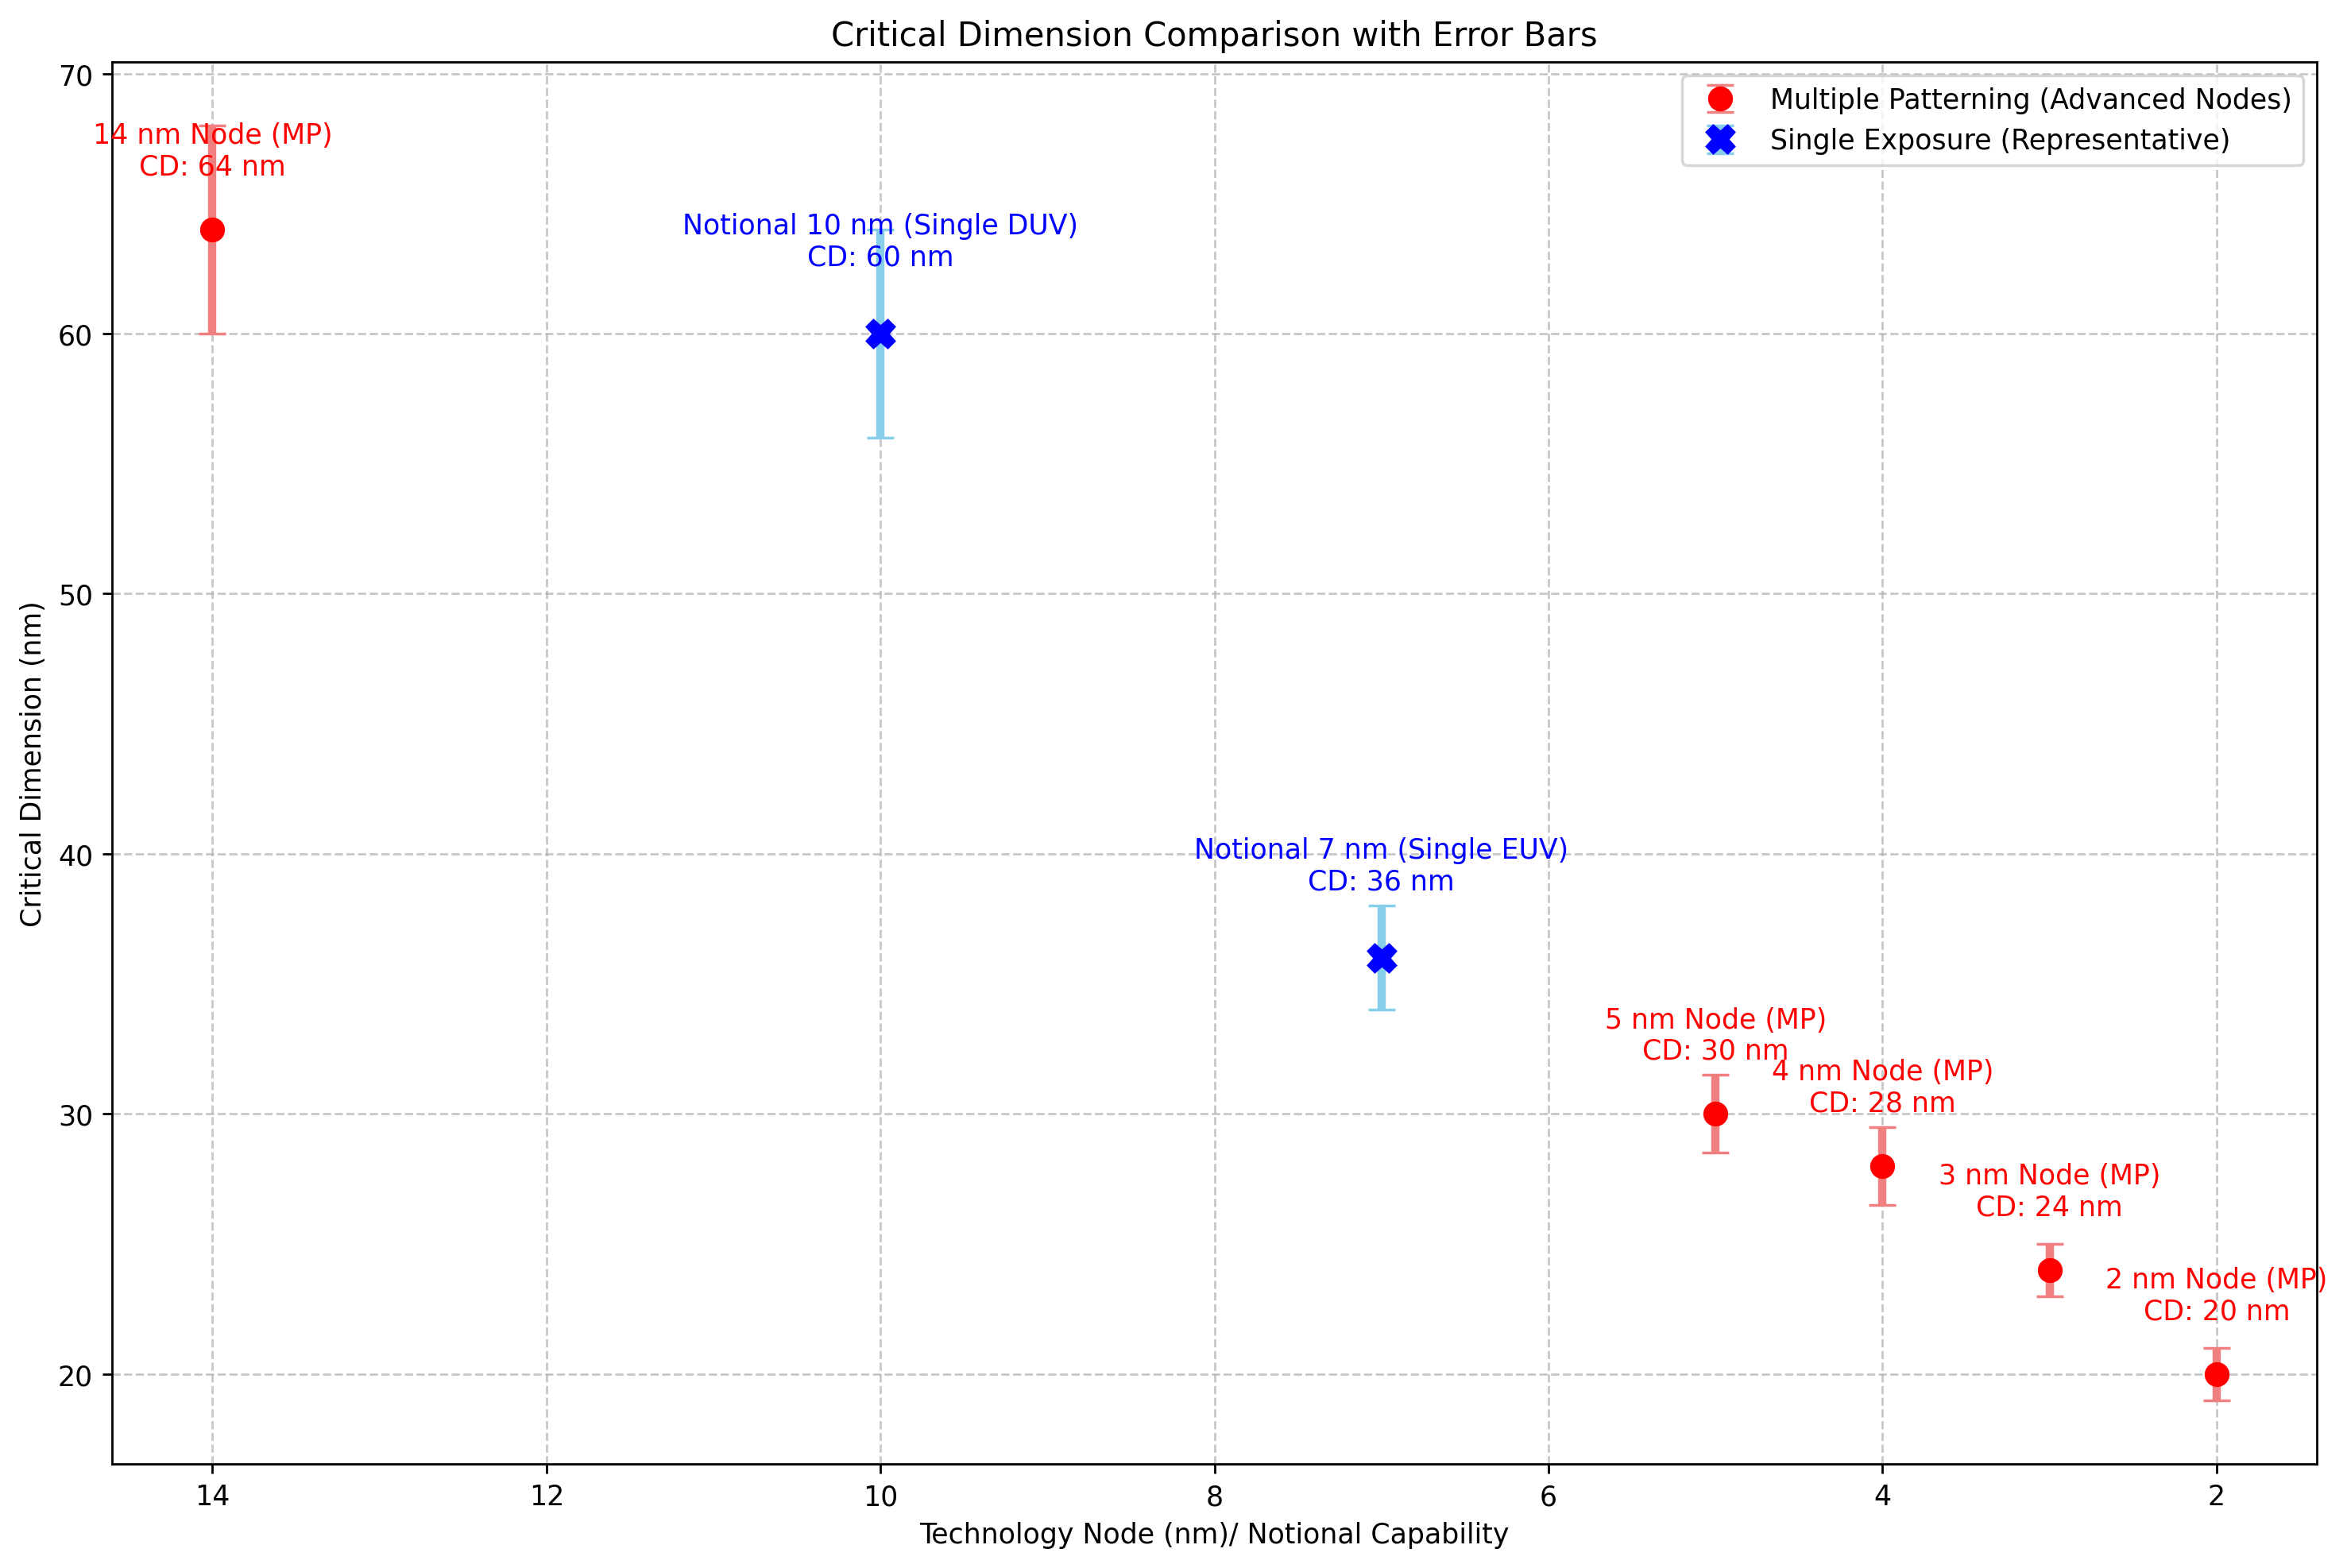

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 250

# --- Data for the Plot ---

# Group 1: Modern Nodes requiring Multiple Patterning
# The 14 nm node data has been added to the beginning of each list below
nodes_modern_mp = [14, 5, 4, 3, 2]
cds_modern_mp = [64, 30, 28, 24, 20]
labels_modern_mp = ['14 nm Node (MP)', '5 nm Node (MP)', '4 nm Node (MP)', '3 nm Node (MP)', '2 nm Node (MP)']
cds_modern_mp_error = [4, 1.5, 1.5, 1, 1]


# Group 2: Representative points for Single Exposure capabilities
nodes_single_exp = [10, 7]
critical_dimensions_single_exp = [60, 36]
labels_single_exp = ['Notional 10 nm (Single DUV)', 'Notional 7 nm (Single EUV)']
# Larger estimated error for these more general points
critical_dimensions_single_exp_error = [4, 2]

# --- Plotting Logic ---

# Create the figure and axes
plt.figure(figsize=(12, 8)) # Increased figure size to better accommodate the new point

# Plot Multiple Patterning points with error bars (red circles)
plt.errorbar(nodes_modern_mp, cds_modern_mp, yerr=cds_modern_mp_error,
             fmt='o', color='red', ecolor='lightcoral', elinewidth=3, capsize=5,
             markersize=8, label='Multiple Patterning (Advanced Nodes)', zorder=2)
# Add labels for each multiple patterning point
for i, txt in enumerate(nodes_modern_mp):
    plt.annotate(f'{labels_modern_mp[i]}\nCD: {cds_modern_mp[i]} nm',
                 (nodes_modern_mp[i], cds_modern_mp[i]),
                 textcoords="offset points", xytext=(0, 20), ha='center', color='red')

# Plot Single Exposure points with error bars (blue 'X' markers)
plt.errorbar(nodes_single_exp, critical_dimensions_single_exp, yerr=critical_dimensions_single_exp_error,
             fmt='X', color='blue', ecolor='skyblue', elinewidth=3, capsize=5,
             markersize=10, label='Single Exposure (Representative)', zorder=2)
# Add labels for each single exposure point
for i, txt in enumerate(nodes_single_exp):
    plt.annotate(f'{labels_single_exp[i]}\nCD: {critical_dimensions_single_exp[i]} nm',
                 (nodes_single_exp[i], critical_dimensions_single_exp[i]),
                 textcoords="offset points", xytext=(0, 25), ha='center', color='blue')

# --- Formatting the Plot ---

# Invert x-axis to show progression from larger to smaller nodes
plt.gca().invert_xaxis()

# Add titles, labels, grid, and legend
plt.title('Critical Dimension Comparison with Error Bars')
plt.xlabel('Technology Node (nm)/ Notional Capability')
plt.ylabel('Critical Dimension (nm)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

plt.show()

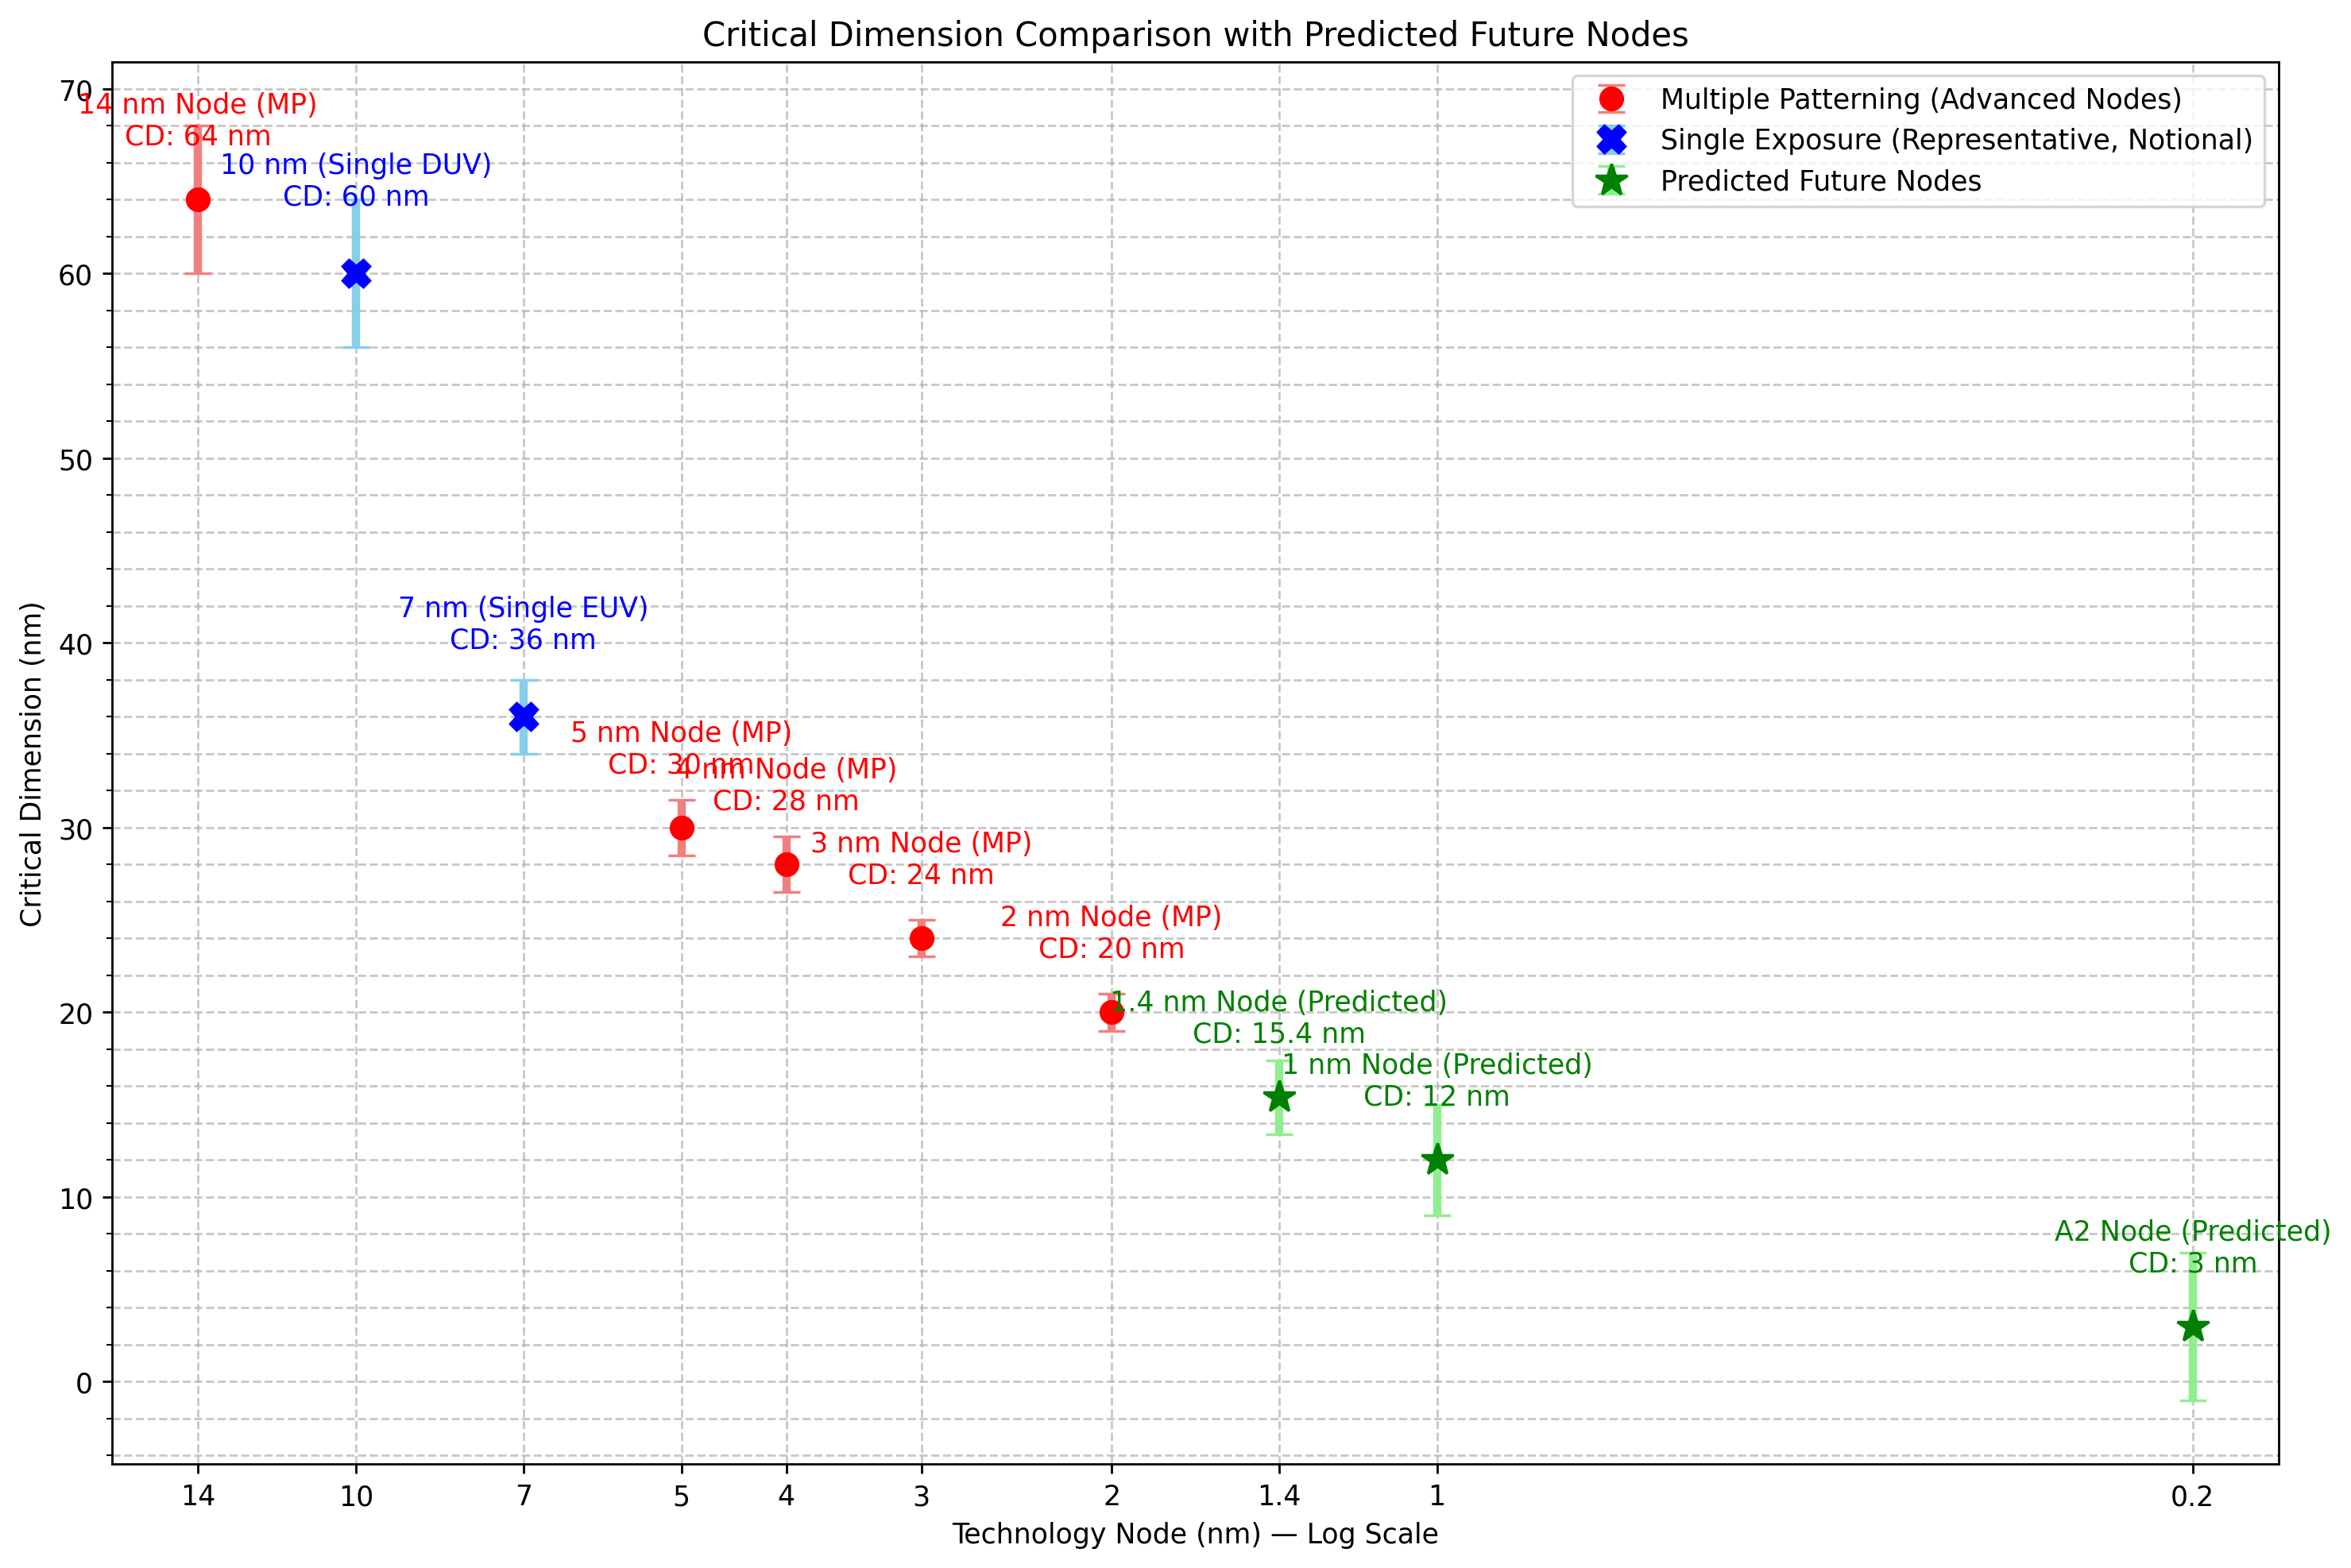

In [4]:
# Plot with predictions for future nodes

import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

plt.rcParams['figure.dpi'] = 250

# --- Data (unchanged) ---
nodes_modern_mp = [14, 5, 4, 3, 2]
cds_modern_mp = [64, 30, 28, 24, 20]
labels_modern_mp = ['14 nm Node (MP)', '5 nm Node (MP)', '4 nm Node (MP)', '3 nm Node (MP)', '2 nm Node (MP)']
cds_modern_mp_error = [4, 1.5, 1.5, 1, 1]

nodes_single_exp = [10, 7]
critical_dimensions_single_exp = [60, 36]
labels_single_exp = ['10 nm (Single DUV)', '7 nm (Single EUV)']
critical_dimensions_single_exp_error = [4, 2]

nodes_future = [1.4, 1, 0.2]
cds_future = [15.4, 12, 3]
labels_future = ['1.4 nm Node (Predicted)', '1 nm Node (Predicted)', 'A2 Node (Predicted)']
cds_future_error = [2, 3, 4]

# --- Helper: decimal-only tick labeler for log axis ---
def _log_decimal_label(x: float) -> str:
    """Return a tidy decimal label for log ticks, no scientific notation."""
    # Snap very-near-integers cleanly (avoids 6.9999999 etc.)
    if math.isfinite(x) and abs(x - round(x)) < 1e-9:
        return f"{int(round(x))}"
    # Values >= 1: at most one decimal (keeps 1.4 without 1.40)
    if x >= 1:
        s = f"{x:.1f}".rstrip("0").rstrip(".")
        return s
    # Values 0 < x < 1: up to two decimals (keeps 0.2, avoids 2e-1)
    s = f"{x:.2f}".rstrip("0").rstrip(".")
    return s

def _tick_formatter(x, pos):
    return _log_decimal_label(x)

# --- Plot ---
fig, ax = plt.subplots(figsize=(12, 8))

# Multiple Patterning (red circles)
ax.errorbar(
    nodes_modern_mp, cds_modern_mp, yerr=cds_modern_mp_error,
    fmt='o', color='red', ecolor='lightcoral', elinewidth=3, capsize=5,
    markersize=8, label='Multiple Patterning (Advanced Nodes)', zorder=2
)
for i in range(len(nodes_modern_mp)):
    ax.annotate(
        f'{labels_modern_mp[i]}\nCD: {cds_modern_mp[i]} nm',
        (nodes_modern_mp[i], cds_modern_mp[i]),
        textcoords="offset points", xytext=(0, 20), ha='center', color='red'
    )

# Single Exposure (blue X)
ax.errorbar(
    nodes_single_exp, critical_dimensions_single_exp, yerr=critical_dimensions_single_exp_error,
    fmt='X', color='blue', ecolor='skyblue', elinewidth=3, capsize=5,
    markersize=10, label='Single Exposure (Representative, Notional)', zorder=2
)
for i in range(len(nodes_single_exp)):
    ax.annotate(
        f'{labels_single_exp[i]}\nCD: {critical_dimensions_single_exp[i]} nm',
        (nodes_single_exp[i], critical_dimensions_single_exp[i]),
        textcoords="offset points", xytext=(0, 25), ha='center', color='blue'
    )

# Predicted Future Nodes (green stars)
ax.errorbar(
    nodes_future, cds_future, yerr=cds_future_error,
    fmt='*', color='green', ecolor='lightgreen', elinewidth=3, capsize=5,
    markersize=12, label='Predicted Future Nodes', zorder=2
)
for i in range(len(nodes_future)):
    ax.annotate(
        f'{labels_future[i]}\nCD: {cds_future[i]} nm',
        (nodes_future[i], cds_future[i]),
        textcoords="offset points", xytext=(0, 20), ha='center', color='green'
    )

# --- Consistent log-x labeling ---
# 1) Log scale
ax.set_xscale('log', base=10)

# 2) Exact tick positions you care about (deduped & sorted)
all_nodes = np.array(sorted({*nodes_modern_mp, *nodes_single_exp, *nodes_future}))
ax.xaxis.set_major_locator(mticker.FixedLocator(all_nodes))

# 3) Decimal-only labels (no 10^k, no 2e-1), and hide minors
ax.xaxis.set_major_formatter(mticker.FuncFormatter(_tick_formatter))
ax.xaxis.set_minor_locator(mticker.NullLocator())      # no minor tick marks
ax.yaxis.set_minor_locator(mticker.AutoMinorLocator()) # keep nice minor y grid if desired

# 4) Show progression from larger → smaller nodes (invert direction cleanly)
#    Invert via limits rather than set_inverted so margins are explicit.
x_lo, x_hi = all_nodes.min(), all_nodes.max()
ax.set_xlim(x_hi * 1.2, x_lo / 1.2)  # reversed order = inverted axis with margins

# Titles, labels, grid, legend
ax.set_title('Critical Dimension Comparison with Predicted Future Nodes')
ax.set_xlabel('Technology Node (nm) — Log Scale')
ax.set_ylabel('Critical Dimension (nm)')
ax.grid(True, which="both", linestyle='--', alpha=0.7)
ax.legend()
fig.tight_layout()
plt.show()

### Critical Dimension Data Summary

| Marketing Node | Dominant Patterning at Critical Layers                                                                               |          Representative Minimum Metal Pitch (nm)         |   Representative Gate/CPP (nm)  |                      EUV NA actually used                      |    **DUV NA actually used**   |
| -------------: | :------------------------------------------------------------------------------------------------------------------- | :------------------------------------------------------: | :-----------------------------: | :------------------------------------------------------------: | :---------------------------: |
|   **16/14 nm** | 193i DUV **multi-patterning** (LELE, **SADP**); no EUV                                                               |       **52–64** (Intel 14 nm ≈ 52; TSMC 16 nm ≈ 64)      |       Intel 14 nm CPP ≈ 70      |                       **N/A** (DUV only)                       | **1.35 (193i ArF immersion)** |
|      **10 nm** | 193i DUV **multi-patterning**, incl. **SAQP**; no EUV                                                                | **36–44** (Intel 10 nm ≈ 36; TSMC 10FF ≈ 42–44 measured) |      TSMC 10FF CPP ≈ 64–66      |                       **N/A** (DUV only)                       | **1.35 (193i ArF immersion)** |
|       **7 nm** | Mix: **N7 (DUV multi-patterning only)**; <br>**N7+ (EUV 0.33 NA on select layers)**                                      |                   **≈ 40** (TSMC N7 M1)                  |    Gate pitch ≈ 57 (TSMC N7)    |                 **0.33** for EUV variants only                 | **1.35 (193i) on DUV layers** |
|       **5 nm** | **EUV 0.33 NA** on many layers **plus** multi-patterning where needed                                                |                  **≈ 30** (M1), M0 ≈ 28                  |             CPP ≈ 48            |                      **0.33** (Low-NA EUV)                     | **1.35 (193i) on DUV layers** |
|       **4 nm** | N5-class refinement: **EUV 0.33 NA** + selective multi-patterning                                                    |                 **≈ 28–30** (M0–M1 class)                |         ≈ 48 (N5-class)         |                            **0.33**                            | **1.35 (193i) on DUV layers** |
|       **3 nm** | **EUV 0.33 NA** + selective multi-patterning                                                                         |                  **≈ 23** (TSMC N3E MMP)                 | **≈ 45** (contacted gate pitch) |                            **0.33**                            | **1.35 (193i) on DUV layers** |
|       **2 nm** | First GAA generation; initial flows plan **EUV 0.33 NA**; <br>**High-NA (0.55)** being piloted mainly by Intel beyond N2 |        **TBD** publicly (low-20 nm class expected)       |             **TBD**             | **0.33** initially; **0.55 (High-NA)** <br>entering R\&D/proto use | **1.35 (193i) on DUV layers** |

| Node (example)          | First HVM year | Patterning at critical layers                                                             |    Min BEOL pitch (MMP, nm) | Contacted poly pitch (CPP, nm) | EUV layers used |  EUV NA  |    **DUV NA actually used**   |
| :---------------------- | :------------: | :---------------------------------------------------------------------------------------- | --------------------------: | -----------------------------: | :-------------: | :------: | :---------------------------: |
| **Intel 14 nm**         |      2014      | 193i DUV with **SADP/LELE**                                                               |      **52** (densest metal) |                         **70** |        0        |    N/A   | **1.35 (193i ArF immersion)** |
| **TSMC 16FF+**          |     2014–15    | 193i DUV with **pitch-split fins**, advanced BEOL patterning                              |              **64** (M1/Mx) |            **90** (gate pitch) |        0        |    N/A   | **1.35 (193i ArF immersion)** |
| **TSMC 10FF**           |      2017      | 193i DUV with **SAQP/quad** on critical layers                                            |                   **42–44** |                      **64–66** |        0        |    N/A   | **1.35 (193i ArF immersion)** |
| **Intel 10 nm**         |     2018–19    | 193i DUV with **SAQP** (diffusion, M0/M1)                                                 |                      **36** |                         **54** |        0        |    N/A   | **1.35 (193i ArF immersion)** |
| **TSMC N7 (DUV-only)**  |      2018      | 193i DUV (**SAQP** fins; **SADP** at 40 nm metals)                                        |                      **40** |                **57** (HD lib) |        0        |    N/A   | **1.35 (193i ArF immersion)** |
| **TSMC N7+ (EUV)**      |      2019      | EUV introduced at a **few (\~4)** layers; rest DUV                                        |                      **44** |                              — |       \~4       | **0.33** |    **1.35 (on DUV layers)**   |
| **Samsung 7LPP (EUV)**  |     2018–19    | EUV on selected layers; rest DUV                                                          |                      **46** | **54** (transistor gate pitch) |       few       | **0.33** |    **1.35 (on DUV layers)**   |
| **TSMC N5**             |      2020      | **Heavy EUV** (10+ layers), fewer masks vs. DUV                                           |                    **\~30** |                       **\~48** |       >10       | **0.33** |    **1.35 (on DUV layers)**   |
| **TSMC N4 / N4P**       |     2022–23    | N5 family refinement, **more EUV layers**                                                 | **\~30** (unchanged family) |                (N5-compatible) |       more      | **0.33** |    **1.35 (on DUV layers)**   |
| **TSMC N3E**            |     2023–24    | EUV-centric; continued MP on some layers                                                  |                    **\~23** |                       **\~48** |       many      | **0.33** |    **1.35 (on DUV layers)**   |
| **TSMC N2**             |      2025+     | Low-NA EUV; backside power; <br>**High-NA not required** per TSMC roadmap for near-successors |                     **TBD** |                        **TBD** |       many      | **0.33** |    **1.35 (on DUV layers)**   |
| **Intel 14A (context)** |     2027–28    | **High-NA EUV** in production plans                                                       |                     **TBD** |                        **TBD** |       many      | **0.55** |  **1.35 (on any DUV layers)** |

```
Nodes
├─ 16/14 nm → 193i multi-patterning (LELE, SADP) → DUV → MMP 52–64 nm
├─ 10 nm    → 193i multi-patterning (SAQP + LELE) → DUV → MMP 36–44 nm
├─ 7 nm     → Branch:
│   ├─ N7 (2018) → DUV multi-patterning only → DUV → MMP ≈ 40 nm
│   └─ N7+ (2019) → Mix: EUV (0.33 NA) + DUV MP → EUV+DUV → MMP ≈ 40 nm
├─ 5 nm     → Many EUV (0.33 NA) layers + some MP → EUV → MMP ≈ 30 nm
├─ 4 nm     → N5-class refinement, EUV 0.33 NA → EUV → MMP ≈ 28–30 nm
├─ 3 nm     → EUV 0.33 NA + MP → EUV → MMP ≈ 23 nm
└─ 2 nm     → EUV 0.33 NA initially; High-NA 0.55 emerging (Intel 14A) → EUV → MMP TBD
```

### Acronym Glossary

| Acronym | Expansion | Plain-English Meaning (what it is/ why it matters) | Typical Value(s) or Example(s) |
| :--- | :--- | :--- | :--- |
| **DUV** | Deep Ultraviolet | Optical lithography using 248 nm (KrF) and especially 193 nm (ArF) lasers to print features on wafers; <br>it was the workhorse for the 28 nm–14 nm era and is still used for many layers. | 193 nm ArF; the immersion variant (193i) is used for higher resolution. |
| **193i** | 193 nm Immersion (ArF) | ArF exposure through a thin water layer between the lens and wafer to boost resolution by increasing numerical aperture. | Tool NAs up to **1.35** (e.g., ASML NXT scanners). |
| **EUV** | Extreme Ultraviolet | Lithography at a **13.5 nm** wavelength, introduced for critical layers at 7 nm and below. | Low-NA **0.33** in HVM; High-NA **0.55** is entering pilot/production plans. |
| **NA** | Numerical Aperture | A lens's "light-gathering" figure of merit; a higher NA improves resolution and depth-of-focus trade-offs. | DUV-immersion up to **1.35**; EUV Low-NA **0.33**, High-NA **0.55**. |
| **ArF** | Argon-Fluoride (excimer laser) | A 193 nm laser used in DUV systems; it's paired with immersion for 14 nm/10 nm multi-patterning. | 193 nm wavelength. |
| **KrF** | Krypton-Fluoride (excimer laser) | An earlier DUV laser used at 248 nm (e.g., for i-line/248 nm eras and some non-critical layers). | 248 nm wavelength. |
| **LELE** | Litho-Etch-Litho-Etch | A "pitch-split" double patterning method: two exposure/etch steps are used to reach a tighter pitch than one exposure can print. | Used broadly at 20–14 nm metals prior to EUV. |
| **SADP** | Self-Aligned Double Patterning | Spacer-based double patterning where spacers are deposited on a mandrel to define two features from one pattern; <br>it's robust for lines with good CDU. | Common for fins and 40 nm-class metals (e.g., TSMC N7 M1). |
| **SAQP** | Self-Aligned Quadruple Patterning | The spacer process is repeated twice to quarter the pitch (two SADP cycles); used where EUV is unavailable or for very tight fins/metals. | Intel 10 nm used SAQP; fins at 7 nm/5 nm are widely SAQP. |
| **MMP** | Minimum Metal Pitch | The tightest **line-and-space pitch** in the BEOL interconnect; a handy, comparable density metric across nodes. | Examples: ~40 nm (N7 M1), ~30 nm (N5/N4 M1). |
| **CPP** | Contacted Poly (Gate) Pitch | The gate-to-gate pitch including the contact; a compact transistor density indicator. | ~57 nm (TSMC N7 HD), ~48 nm (N5/N3 family). |
| **FEOL** | Front End of Line | The process block where transistors and other devices are formed in or near the silicon. | Precedes MOL/BEOL. |
| **MOL** | Middle of Line | The "contacts" block linking devices to first metals; includes source/drain and gate contacts, and local interconnect. | Imec highlights MOL as a key scaling lever (e.g., semi-damascene). |
| **BEOL** | Back End of Line | The multi-level metal and dielectric interconnect stack that wires devices together. | Includes M0/M1…Mx routing layers and vias. |
| **HVM** | High-Volume Manufacturing | The mass-production phase, after risk production, when a node or product runs at scale. Widely used by foundries/IDMs. | E.g., Intel 18A "progressing toward high-volume production." |
| **OPC** | Optical Proximity Correction | Mask "pre-distortion" to compensate for diffraction and process effects so that printed shapes match the intent. Often used with SRAFs. | Essential at sub-wavelength printing (KrF/ArF/EUV). |
| **SRAF** | Sub-Resolution Assist Feature | Non-printing helper shapes on masks that improve the imaging of nearby features. | Model-based SRAF generation is common in advanced RET flows. |
| **CDU** | Critical Dimension Uniformity | The across-wafer variation of a printed feature's size around its target; tighter CDU means tighter control and better yield. | A key metric for DUV/EUV processes and resists. |
| **LER** | Line Edge Roughness | The random edge jaggedness of lines that degrades variability and performance; especially critical at tight pitches. | ITRS historically targeted LWR/LER specs vs. linewidth. |
| **LWR** | Line Width Roughness | The variation of the **width** along a line; it's related to the LER of both edges and affects device variability. | EUV stochastics drive LWR budgets at tight pitches. |
| **EPE** | Edge Placement Error | The net placement error of a shape’s edge, combining CD errors, overlay, and stochastic effects; key to yield at advanced nodes. | Formalized in SPIE/EUV metrology literature. |
| **RET** | Resolution Enhancement Tech. | A suite of optical/mask tricks—OPC, phase-shift masks, off-axis illumination, SRAFs—to push resolution beyond naïve limits. | Core to extending KrF/ArF and enhancing EUV process windows. |
| **NGL** | Next-Generation Lithography | An umbrella term for post-193i candidates (EUV, e-beam, nanoimprint, DSA, etc.). | EUV is the NGL that reached HVM. |
| **BARC** | Bottom Anti-Reflective Coating | A coating under the resist to suppress standing waves/reflections and improve CD control. | Used widely in DUV processes. |
| **CAR** | Chemically Amplified Resist | A resist chemistry where a photo-acid catalyzes many reactions during the post-exposure bake, boosting sensitivity. | Dominant in DUV and EUV resists; active research on EUV-CAR trade-offs. |
| **PEB** | Post-Exposure Bake | A thermal step after exposure that drives acid-catalyzed reactions and reduces standing-wave artifacts. | Timing and temperature are critical for CAR processes. |
| **OPC/OAI/PSM** | (grouped) | Three canonical RETs often used together: mask edge moves (OPC), off-axis illumination (OAI), and phase-shifting masks (PSM). | Enabled deep sub-λ patterning with 193 nm tools. |

### **References**

1.  **ASML (2024a)** *TWINSCAN NXT:2000i DUV Lithography System*. Available at: [https://www.asml.com/en/products/duv-lithography-systems/twinscan-nxt2000i](https://www.asml.com/en/products/duv-lithography-systems/twinscan-nxt2000i).

2.  **ASML (2024b)** *NXE:3800E EUV Lithography System*. Available at: [https://www.asml.com/en/products/euv-lithography-systems/nxe3800e](https://www.google.com/search?q=https://www.asml.com/en/products/euv-lithography-systems/nxe3800e).

3.  **ASML (2024c)** *EXE:5000 High-NA EUV Lithography System*. Available at: [https://www.asml.com/en/products/euv-lithography-systems/exeseries](https://www.google.com/search?q=https://www.asml.com/en/products/euv-lithography-systems/exeseries).

4.  **Auth, C. et al. (2017)** 'A 10nm High Performance and Low-Power CMOS Technology Featuring 3rd Generation FinFET Transistors, Self-Aligned Quad Patterning, Contact over Active Gate and Cobalt Local Interconnects', *2017 IEEE International Electron Devices Meeting (IEDM)*, pp. 29.1.1-29.1.4. doi: 10.1109/IEDM.2017.8268472.

5.  **Jones, S. (2019)** *TSMC 7nm EUV (N7+)*. TechInsights. Available at: [https://www.techinsights.com/blog/tsmc-7nm-euv-n7-process](https://www.google.com/search?q=https://www.techinsights.com/blog/tsmc-7nm-euv-n7-process).

6.  **Lee, Y.-J. et al. (2022)** 'A Novel 3nm Gate-All-Around Technology for High Performance and Low Power Platform Application', *2022 IEEE International Electron Devices Meeting (IEDM)*, pp. 1.2.1-1.2.4. doi: 10.1109/IEDM45625.2022.10019556.

7.  **Mack, C.A. (2021)** *The Multiple Lives of Multiple Patterning*. Available at: [https://arxiv.org/abs/2101.05833](https://arxiv.org/abs/2101.05833).

8.  **Shih, C.-C. et al. (2023)** 'A 2nm-Class Nanocrystal-Bottom-Contact-Nanosheet (NBNS) Technology for Next Generation Low-Power and High-Performance Computing', *2023 IEEE International Electron Devices Meeting (IEDM)*, pp. 31.4.1-31.4.4. doi: 10.1109/IEDM45625.2023.10413788.

9.  **WikiChip (2021)** *14 nm lithography process*. Available at: [https://en.wikichip.org/wiki/14\_nm\_lithography\_process](https://en.wikichip.org/wiki/14_nm_lithography_process).

10. **WikiChip (2022a)** *7 nm lithography process*. Available at: [https://en.wikichip.org/wiki/7\_nm\_lithography\_process](https://en.wikichip.org/wiki/7_nm_lithography_process).

11. **WikiChip (2022b)** *5 nm lithography process*. Available at: [https://en.wikichip.org/wiki/5\_nm\_lithography\_process](https://en.wikichip.org/wiki/5_nm_lithography_process).